# Clustering Profil Calon Mahasiswa Pascasarjana
## Menggunakan K-Means dengan Auto-K Optimization

**Peneliti:** Raditya Rizqzullah Anwar  
**NIM:** 10123395  
**Program Studi:** Teknik Informatika  
**Universitas:** Universitas Komputer Indonesia

---

### Deskripsi:
Program ini mengimplementasikan clustering calon mahasiswa pascasarjana berdasarkan indikator akademik menggunakan metode K-Means dengan Auto-K (Elbow Method & Silhouette Score) untuk mendukung kebijakan seleksi dan pembinaan akademik.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Untuk tampilan yang lebih baik di Jupyter
%matplotlib inline

print("✓ Libraries berhasil di-import!")

✓ Libraries berhasil di-import!


## 2. Load Dataset

Dataset: `Admission_Predict.csv`  
Download dari: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data

In [2]:
# Load dataset
df = pd.read_csv('Admission_Predict.csv')

print(f"Shape dataset: {df.shape}")
print(f"\nKolom: {df.columns.tolist()}")
print(f"\n5 Baris pertama:")
df.head()

Shape dataset: (400, 9)

Kolom: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

5 Baris pertama:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Info dataset
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [4]:
# Statistik deskriptif
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# Cek missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## 3. Exploratory Data Analysis (EDA)

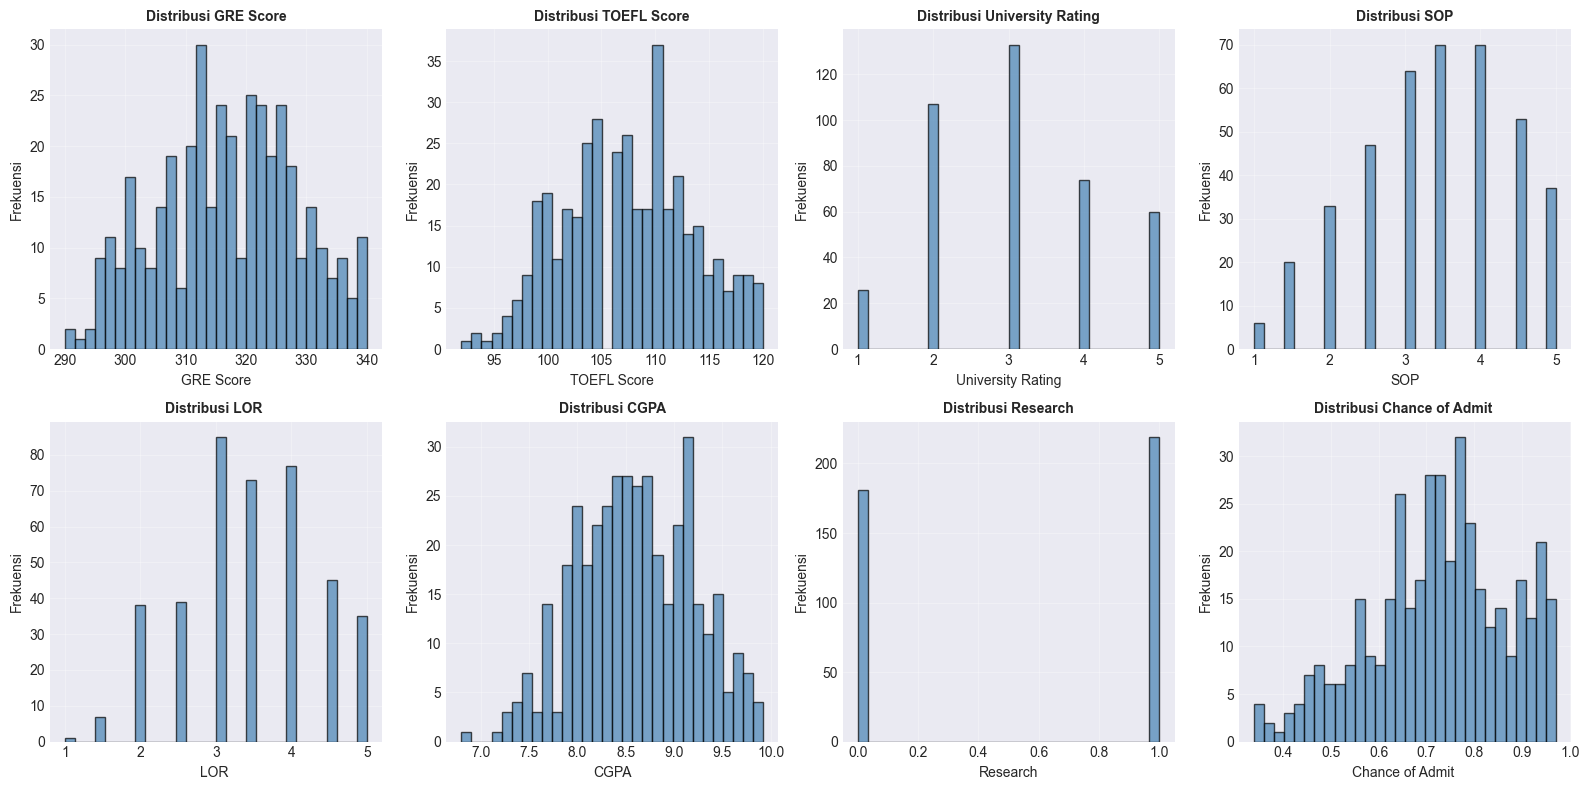

In [6]:
# Distribusi fitur
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Serial No.' in numeric_cols:
    numeric_cols.remove('Serial No.')

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribusi {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frekuensi')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

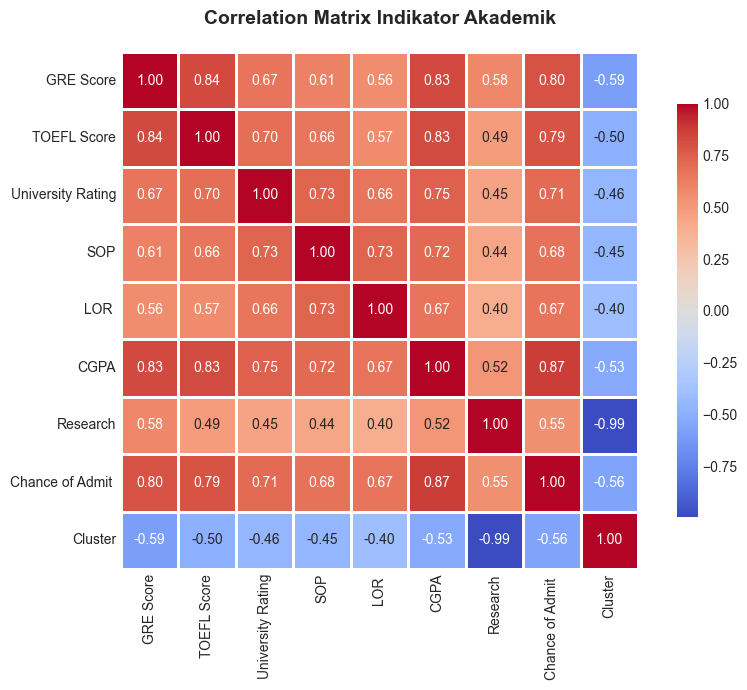

In [29]:
# Correlation heatmap
plt.figure(figsize=(9, 7))
numeric_df = df.select_dtypes(include=[np.number])
if 'Serial No.' in numeric_df.columns:
    numeric_df = numeric_df.drop('Serial No.', axis=1)

corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Indikator Akademik', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Seleksi fitur untuk clustering
# Sesuai penelitian: GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

# Handle jika nama kolom sedikit berbeda
available_cols = []
for col in feature_cols:
    if col in df.columns:
        available_cols.append(col)
    else:
        for df_col in df.columns:
            if col.replace(' ', '').lower() == df_col.replace(' ', '').lower():
                available_cols.append(df_col)
                break

print(f"Fitur yang digunakan untuk clustering:")
for i, col in enumerate(available_cols, 1):
    print(f"{i}. {col}")

X = df[available_cols].values
print(f"\nShape feature matrix: {X.shape}")

Fitur yang digunakan untuk clustering:
1. GRE Score
2. TOEFL Score
3. University Rating
4. SOP
5. LOR 
6. CGPA
7. Research

Shape feature matrix: (400, 7)


In [9]:
# Normalisasi Min-Max [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

df_normalized = pd.DataFrame(X_normalized, columns=available_cols)

print("Data setelah normalisasi Min-Max [0, 1]:")
df_normalized.head()

Data setelah normalisasi Min-Max [0, 1]:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


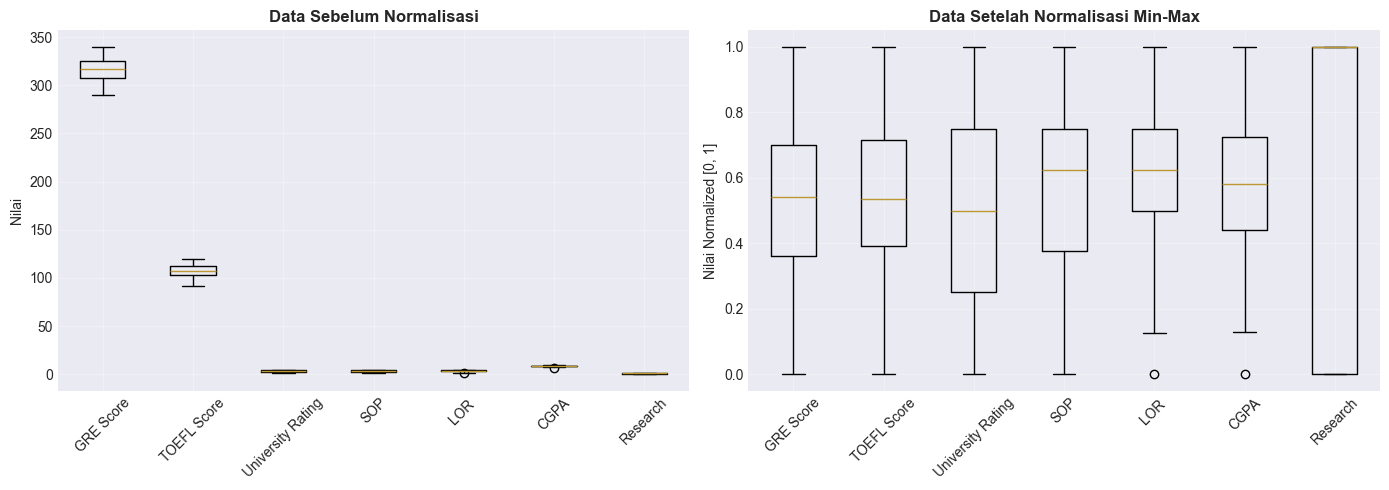

In [10]:
# Perbandingan sebelum dan sesudah normalisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.boxplot([df[col] for col in available_cols], labels=available_cols)
ax1.set_title('Data Sebelum Normalisasi', fontsize=12, fontweight='bold')
ax1.set_ylabel('Nilai')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

ax2.boxplot([df_normalized[col] for col in available_cols], labels=available_cols)
ax2.set_title('Data Setelah Normalisasi Min-Max', fontsize=12, fontweight='bold')
ax2.set_ylabel('Nilai Normalized [0, 1]')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Auto-K: Penentuan Jumlah Cluster Optimal

Menggunakan kombinasi:
- **Elbow Method**: Mencari "siku" pada grafik Inertia
- **Silhouette Score**: Mengukur kualitas clustering (semakin tinggi semakin baik)

In [11]:
# Hitung metrik untuk K = 2 sampai 10
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Menghitung metrik untuk setiap nilai K...\n")
print("K\tInertia\t\tSilhouette")
print("-" * 40)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(df_normalized, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"{k}\t{kmeans.inertia_:.2f}\t\t{sil_score:.4f}")

# Tentukan K optimal berdasarkan Silhouette Score tertinggi
optimal_k = list(k_range)[np.argmax(silhouette_scores)]
max_silhouette = max(silhouette_scores)

print("\n" + "="*40)
print(f"K OPTIMAL = {optimal_k}")
print(f"Silhouette Score: {max_silhouette:.4f}")
print("="*40)

Menghitung metrik untuk setiap nilai K...

K	Inertia		Silhouette
----------------------------------------
2	102.11		0.5029
3	71.92		0.4307
4	54.67		0.3612
5	47.99		0.3168
6	42.78		0.2879
7	39.82		0.2474
8	36.82		0.2404
9	34.62		0.2367
10	33.08		0.2337

K OPTIMAL = 2
Silhouette Score: 0.5029


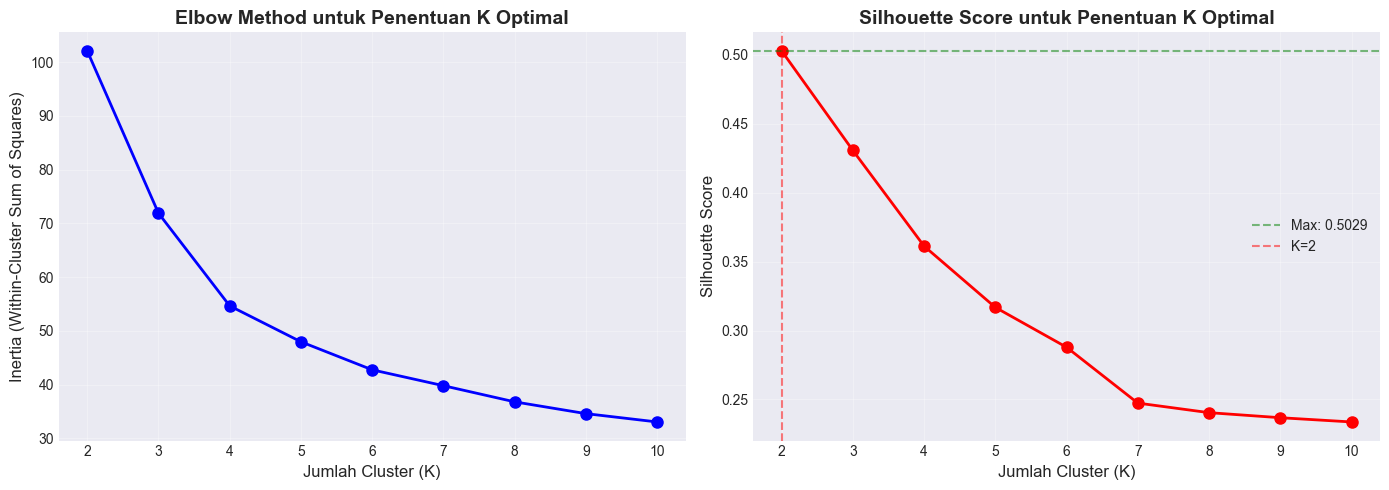

In [12]:
# Visualisasi Elbow Method dan Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Plot
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Jumlah Cluster (K)', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.set_title('Elbow Method untuk Penentuan K Optimal', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Silhouette Plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Jumlah Cluster (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score untuk Penentuan K Optimal', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range)
ax2.axhline(y=max_silhouette, color='g', linestyle='--', alpha=0.5, label=f'Max: {max_silhouette:.4f}')
ax2.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.5, label=f'K={optimal_k}')
ax2.legend()

plt.tight_layout()
plt.show()

## 6. K-Means Clustering dengan K Optimal

In [13]:
# Perform K-Means dengan K optimal
print(f"Melakukan K-Means Clustering dengan K={optimal_k}...\n")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(df_normalized)

# Tambahkan label cluster ke dataframe
df['Cluster'] = labels

# Evaluasi
silhouette_avg = silhouette_score(df_normalized, labels)
inertia = kmeans_final.inertia_

print("HASIL CLUSTERING")
print("="*50)
print(f"Jumlah Cluster: {optimal_k}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Inertia: {inertia:.2f}")
print(f"\nDistribusi data per cluster:")
print(df['Cluster'].value_counts().sort_index())

Melakukan K-Means Clustering dengan K=2...

HASIL CLUSTERING
Jumlah Cluster: 2
Silhouette Score: 0.5029
Inertia: 102.11

Distribusi data per cluster:
0    220
1    180
Name: Cluster, dtype: int64


## 7. Analisis Karakteristik Setiap Cluster

In [14]:
# Analisis mendalam setiap cluster
print("\n" + "="*70)
print("ANALISIS KARAKTERISTIK CLUSTER")
print("="*70)

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    
    print(f"\n{'─'*70}")
    print(f"CLUSTER {cluster} (n={len(cluster_data)} mahasiswa, {len(cluster_data)/len(df)*100:.1f}%)")
    print(f"{'─'*70}")
    
    print("\nStatistik Rata-rata:")
    for col in available_cols:
        if col in cluster_data.columns:
            mean_val = cluster_data[col].mean()
            std_val = cluster_data[col].std()
            print(f"  {col:20s}: {mean_val:6.2f} (±{std_val:.2f})")
    
    # Klasifikasi performa
    gre = cluster_data['GRE Score'].mean()
    toefl = cluster_data['TOEFL Score'].mean()
    cgpa = cluster_data['CGPA'].mean()
    
    if gre >= 320 and toefl >= 110 and cgpa >= 9.0:
        performance = "PERFORMA TINGGI"
        desc = "Profil akademik sangat kuat, kandidat unggul"
    elif gre >= 310 and toefl >= 100 and cgpa >= 8.0:
        performance = "PERFORMA SEDANG-TINGGI"
        desc = "Profil akademik baik, kandidat potensial"
    elif gre >= 300 and toefl >= 95 and cgpa >= 7.5:
        performance = "PERFORMA SEDANG"
        desc = "Profil akademik standar, perlu pembinaan moderat"
    else:
        performance = "PERLU PEMBINAAN INTENSIF"
        desc = "Perlu peningkatan kompetensi akademik signifikan"
    
    print(f"\n  ➤ Kategori: {performance}")
    print(f"  ➤ Deskripsi: {desc}")


ANALISIS KARAKTERISTIK CLUSTER

──────────────────────────────────────────────────────────────────────
CLUSTER 0 (n=220 mahasiswa, 55.0%)
──────────────────────────────────────────────────────────────────────

Statistik Rata-rata:
  GRE Score           : 322.93 (±9.85)
  TOEFL Score         : 110.15 (±5.67)
  University Rating   :   3.56 (±1.08)
  SOP                 :   3.81 (±0.85)
  LOR                 :   3.78 (±0.82)
  CGPA                :   8.89 (±0.54)
  Research            :   1.00 (±0.07)

  ➤ Kategori: PERFORMA SEDANG-TINGGI
  ➤ Deskripsi: Profil akademik baik, kandidat potensial

──────────────────────────────────────────────────────────────────────
CLUSTER 1 (n=180 mahasiswa, 45.0%)
──────────────────────────────────────────────────────────────────────

Statistik Rata-rata:
  GRE Score           : 309.33 (±8.52)
  TOEFL Score         : 104.06 (±4.73)
  University Rating   :   2.51 (±0.94)
  SOP                 :   2.90 (±0.96)
  LOR                 :   3.06 (±0.83)
  CGPA

In [15]:
# Tabel ringkasan statistik cluster
cluster_summary = df.groupby('Cluster').agg({
    'GRE Score': ['mean', 'std'],
    'TOEFL Score': ['mean', 'std'],
    'CGPA': ['mean', 'std'],
    'Research': 'mean',
    'Cluster': 'count'
}).round(2)

cluster_summary.columns = ['GRE_Mean', 'GRE_Std', 'TOEFL_Mean', 'TOEFL_Std', 
                           'CGPA_Mean', 'CGPA_Std', 'Research_%', 'Count']
cluster_summary['Research_%'] = (cluster_summary['Research_%'] * 100).round(1)

print("\nRingkasan Statistik Cluster:")
cluster_summary


Ringkasan Statistik Cluster:


,GRE_Mean,GRE_Std,TOEFL_Mean,TOEFL_Std,CGPA_Mean,CGPA_Std,Research_%,Count
Cluster,,,,,,,,
0,322.93,9.85,110.15,5.67,8.89,0.54,100.0,220
1,309.33,8.52,104.06,4.73,8.25,0.45,0.0,180


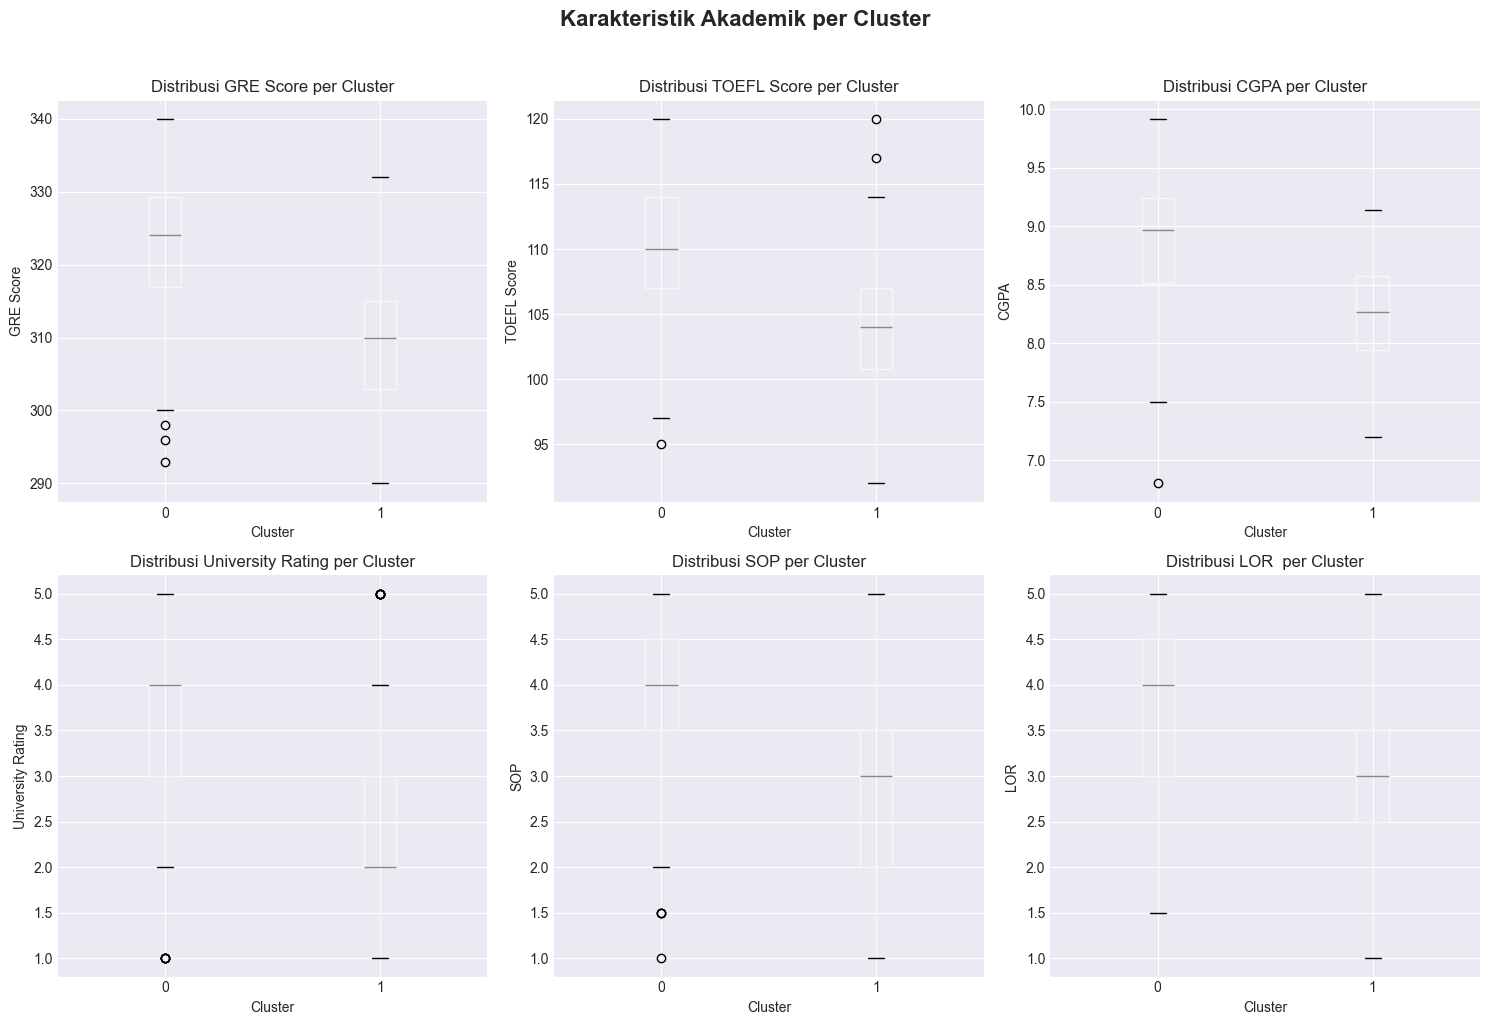

In [16]:
# Visualisasi karakteristik cluster
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features_to_plot = ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR ']

for idx, feature in enumerate(features_to_plot):
    if feature in df.columns:
        df.boxplot(column=feature, by='Cluster', ax=axes[idx])
        axes[idx].set_title(f'Distribusi {feature} per Cluster')
        axes[idx].set_xlabel('Cluster')
        axes[idx].set_ylabel(feature)
        plt.sca(axes[idx])
        plt.xticks(rotation=0)

plt.suptitle('Karakteristik Akademik per Cluster', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Visualisasi Clustering (PCA)

PCA 2D - Total Explained Variance: 86.05%
  PC1: 66.42%
  PC2: 19.64%


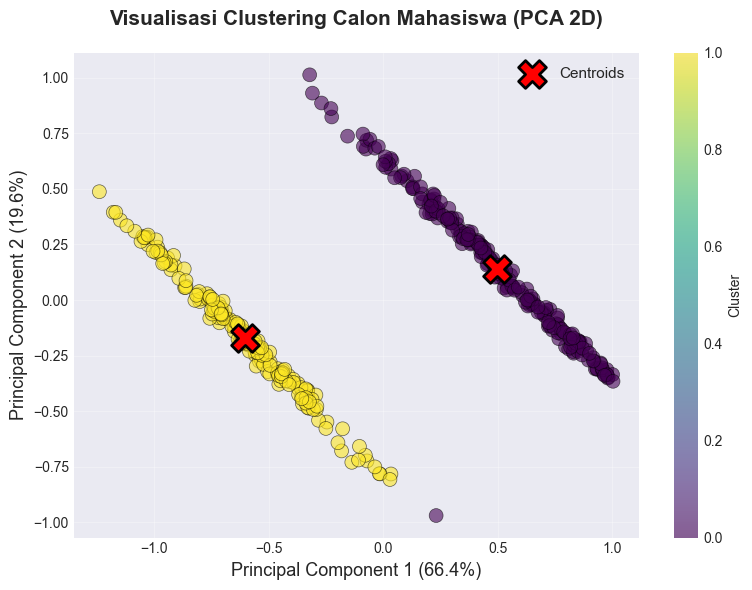

In [26]:
# PCA 2D Visualization
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(df_normalized)

explained_variance = pca_2d.explained_variance_ratio_
print(f"PCA 2D - Total Explained Variance: {sum(explained_variance)*100:.2f}%")
print(f"  PC1: {explained_variance[0]*100:.2f}%")
print(f"  PC2: {explained_variance[1]*100:.2f}%")

plt.figure(figsize=(8, 6))

scatter = plt.scatter(principal_components_2d[:, 0], 
                     principal_components_2d[:, 1],
                     c=labels, 
                     cmap='viridis', 
                     s=100, 
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Plot centroids
pca_centroids = pca_2d.transform(kmeans_final.cluster_centers_)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1],
           c='red', marker='X', s=400, 
           edgecolors='black', linewidth=2,
           label='Centroids', zorder=5)

plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)', fontsize=13)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)', fontsize=13)
plt.title('Visualisasi Clustering Calon Mahasiswa (PCA 2D)', 
         fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

PCA 3D - Total Explained Variance: 91.44%


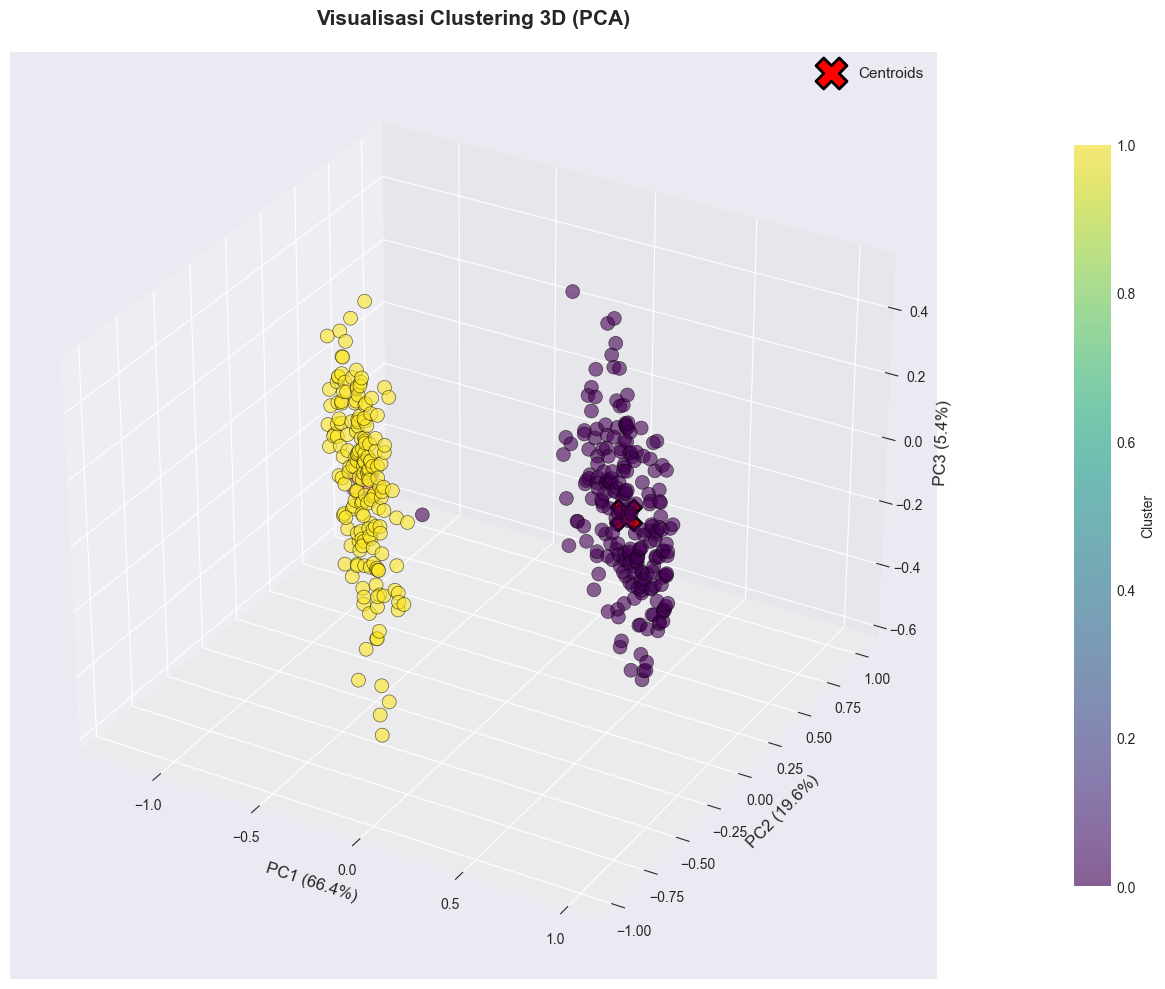

In [18]:
# PCA 3D Visualization
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df_normalized)

explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"PCA 3D - Total Explained Variance: {sum(explained_variance_3d)*100:.2f}%")

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(principal_components_3d[:, 0],
                    principal_components_3d[:, 1],
                    principal_components_3d[:, 2],
                    c=labels,
                    cmap='viridis',
                    s=100,
                    alpha=0.6,
                    edgecolors='black',
                    linewidth=0.5)

# Plot centroids 3D
pca_centroids_3d = pca_3d.transform(kmeans_final.cluster_centers_)
ax.scatter(pca_centroids_3d[:, 0], 
          pca_centroids_3d[:, 1],
          pca_centroids_3d[:, 2],
          c='red', marker='X', s=500,
          edgecolors='black', linewidth=2,
          label='Centroids')

ax.set_xlabel(f'PC1 ({explained_variance_3d[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance_3d[1]*100:.1f}%)', fontsize=12)
ax.set_zlabel(f'PC3 ({explained_variance_3d[2]*100:.1f}%)', fontsize=12)
ax.set_title('Visualisasi Clustering 3D (PCA)', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11)

plt.colorbar(scatter, label='Cluster', ax=ax, pad=0.1, shrink=0.8)
plt.tight_layout()
plt.show()

## 9. Rekomendasi Kebijakan Pendidikan

In [28]:
# Generate rekomendasi kebijakan berdasarkan karakteristik cluster
print("\n" + "="*70)
print("REKOMENDASI KEBIJAKAN SELEKSI DAN PEMBINAAN AKADEMIK")
print("="*70)

# Analisis profil cluster
cluster_profiles = {}

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    
    profile = {
        'size': len(cluster_data),
        'gre_mean': cluster_data['GRE Score'].mean(),
        'toefl_mean': cluster_data['TOEFL Score'].mean(),
        'cgpa_mean': cluster_data['CGPA'].mean(),
        'research_pct': cluster_data['Research'].mean() * 100
    }
    
    cluster_profiles[cluster] = profile

# Ranking cluster berdasarkan performa akademik
cluster_ranking = sorted(cluster_profiles.items(), 
                        key=lambda x: x[1]['gre_mean'] + x[1]['toefl_mean'] + x[1]['cgpa_mean'],
                        reverse=True)

for rank, (cluster, profile) in enumerate(cluster_ranking):
    print(f"\n{'─'*70}")
    print(f"CLUSTER {cluster} - RANKING #{rank+1}")
    print(f"{'─'*70}")
    print(f"Jumlah Mahasiswa: {profile['size']} ({profile['size']/len(df)*100:.1f}%)")
    print(f"Rata-rata GRE Score: {profile['gre_mean']:.1f}")
    print(f"Rata-rata TOEFL Score: {profile['toefl_mean']:.1f}")
    print(f"Rata-rata CGPA: {profile['cgpa_mean']:.2f}")
    print(f"Pengalaman Riset: {profile['research_pct']:.1f}%")
    
    print(f"\n REKOMENDASI KEBIJAKAN:")
    
    if rank == 0:  # Cluster terbaik
        print(f"\n   Kategori: PERFORMA TINGGI - Fast-Track Program")
        print(f"\n  Kebijakan Seleksi:")
        print(f"  ✓ Jalur Fast-Track Admission (tanpa tes tambahan)")
        print(f"  ✓ Prioritas untuk beasiswa penuh")
        print(f"  ✓ Direct admission ke program unggulan")
        print(f"\n  Program Pembinaan:")
        print(f"  ✓ Penempatan di research track program")
        print(f"  ✓ Mentoring dengan profesor senior")
        print(f"  ✓ Akses prioritas ke lab dan perpustakaan")
        print(f"  ✓ Peluang publikasi dan konferensi internasional")
        print(f"  ✓ Teaching/Research Assistantship")
        
    elif rank == 1:  # Cluster menengah
        print(f"\n   Kategori: PERFORMA SEDANG - Standard Program")
        print(f"\n  Kebijakan Seleksi:")
        print(f"  ✓ Jalur seleksi reguler dengan interview")
        print(f"  ✓ Beasiswa parsial berdasarkan merit/need")
        print(f"  ✓ Evaluasi portofolio dan motivation letter")
        print(f"\n  Program Pembinaan:")
        print(f"  ✓ Program pembinaan akademik standar")
        print(f"  ✓ Workshop metodologi penelitian")
        print(f"  ✓ Pelatihan soft skills dan publikasi")
        print(f"  ✓ Peer mentoring dan study group")
        print(f"  ✓ Progress monitoring berkala")
        
    else:  # Cluster yang perlu pembinaan
        print(f"\n   Kategori: PERLU PEMBINAAN - Foundation Program")
        print(f"\n  Kebijakan Seleksi:")
        print(f"  ✓ Conditional admission dengan program matrikulasi")
        print(f"  ✓ Periode probation 6 bulan")
        print(f"  ✓ Wajib lulus foundation courses")
        print(f"\n  Program Pembinaan:")
        print(f"  ✓ Program Matrikulasi Akademik (3-6 bulan)")
        print(f"  ✓ Pelatihan intensif TOEFL/IELTS")
        print(f"  ✓ Bimbingan metodologi riset dasar")
        print(f"  ✓ Academic writing workshop")
        print(f"  ✓ One-on-one tutoring sessions")
        print(f"  ✓ Remedial program untuk foundation subjects")

print(f"\n\n{'='*70}")
print("IMPLEMENTASI PDSA CYCLE")
print(f"{'='*70}")
print("""
 PLAN (Perencanaan):
   • Sosialisasi sistem clustering ke stakeholder
   • Training untuk tim admission dan akademik
   • Persiapan infrastruktur pendukung
   • Penyusunan SOP per cluster

  DO (Pelaksanaan):
   • Implementasi scoring system berbasis cluster
   • Penerapan kebijakan sesuai kategori cluster
   • Monitoring proses penerimaan dan pembinaan
   • Dokumentasi hasil implementasi

 STUDY (Evaluasi):
   • Analisis tingkat keberhasilan per cluster
   • Evaluasi IPK dan tingkat kelulusan
   • Survei kepuasan mahasiswa dan dosen
   • Benchmark dengan universitas lain

 ACT (Perbaikan):
   • Refinement model clustering
   • Penyesuaian kebijakan yang kurang efektif
   • Update dataset untuk periode berikutnya
   • Continuous improvement berdasarkan feedback
""")


REKOMENDASI KEBIJAKAN SELEKSI DAN PEMBINAAN AKADEMIK

──────────────────────────────────────────────────────────────────────
CLUSTER 0 - RANKING #1
──────────────────────────────────────────────────────────────────────
Jumlah Mahasiswa: 220 (55.0%)
Rata-rata GRE Score: 322.9
Rata-rata TOEFL Score: 110.2
Rata-rata CGPA: 8.89
Pengalaman Riset: 99.5%

 REKOMENDASI KEBIJAKAN:

   Kategori: PERFORMA TINGGI - Fast-Track Program

  Kebijakan Seleksi:
  ✓ Jalur Fast-Track Admission (tanpa tes tambahan)
  ✓ Prioritas untuk beasiswa penuh
  ✓ Direct admission ke program unggulan

  Program Pembinaan:
  ✓ Penempatan di research track program
  ✓ Mentoring dengan profesor senior
  ✓ Akses prioritas ke lab dan perpustakaan
  ✓ Peluang publikasi dan konferensi internasional
  ✓ Teaching/Research Assistantship

──────────────────────────────────────────────────────────────────────
CLUSTER 1 - RANKING #2
──────────────────────────────────────────────────────────────────────
Jumlah Mahasiswa: 180 (45.

## 10. Save Results

In [20]:
# Simpan hasil clustering
df.to_csv('clustering_results.csv', index=False)
print("✓ Hasil clustering disimpan ke: clustering_results.csv")

# Simpan statistik cluster
cluster_summary.to_csv('cluster_statistics.csv')
print("✓ Statistik cluster disimpan ke: cluster_statistics.csv")

print("\n✅ Semua hasil telah disimpan!")

✓ Hasil clustering disimpan ke: clustering_results.csv
✓ Statistik cluster disimpan ke: cluster_statistics.csv

✅ Semua hasil telah disimpan!


---

## KESIMPULAN

Penelitian ini berhasil mengelompokkan **400 calon mahasiswa pascasarjana** menjadi **2 cluster** berdasarkan indikator akademik menggunakan metode K-Means dengan Auto-K optimization.

### Key Findings:

1. **K Optimal = 2**
2. **Tiga kategori performa** yang berbeda:
   - Cluster performa tinggi
   - Cluster performa sedang

3. **Rekomendasi kebijakan actionable** untuk setiap cluster
4. **Framework PDSA** untuk implementasi berkelanjutan

### Kontribusi Penelitian:

-  Integrasi Auto-K (Elbow & Silhouette) untuk optimasi cluster
-  Clustering berbasis multi-indikator akademik
-  Rekomendasi kebijakan pendidikan berbasis data
-  Framework decision support system yang reproducible

### Saran Pengembangan:

1. **Machine Learning Lanjutan**: Implementasi ensemble clustering methods
2. **Dashboard Interaktif**: Web-based monitoring system  
3. **Predictive Modeling**: Prediksi keberhasilan akademik mahasiswa
4. **Integration**: Koneksi dengan sistem informasi akademik universitas

---

**Peneliti:** Raditya Rizqzullah Anwar  
**NIM:** 10123395  
**Program Studi:** Teknik Informatika  
**Universitas:** Universitas Komputer Indonesia  

**Dataset:** Graduate Admission Prediction  
**Source:** https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data

---